<a href="https://colab.research.google.com/github/cwcheng0/practicepython/blob/master/SKLearn_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

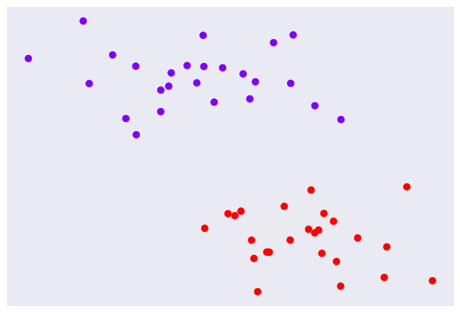

In [44]:
# SKLearn SVM
# source1 video http://www.peixun.net/main.php?mod=course&cid=1281
# 2019-2-16
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

array([[-7.51270012e-01, -4.31731676e-01],
       [-7.51270012e-01, -2.17952020e-01],
       [-7.51270012e-01, -4.17236442e-03],
       ...,
       [ 3.38090414e+00,  5.34031903e+00],
       [ 3.38090414e+00,  5.55409868e+00],
       [ 3.38090414e+00,  5.76787834e+00]])

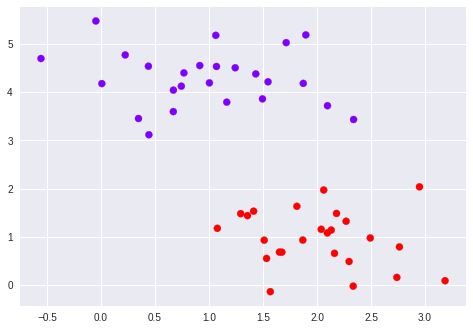

In [45]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim() #默认创建(0.0, 1.0)范围内的横纵坐标

#要画决策边界，必须要有网格
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
axisy,axisx = np.meshgrid(axisy,axisx)

#将特征向量转换为特征矩阵的函数
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
xy

In [46]:
xy.shape

(900, 2)

In [47]:
#获取y.shape * x.shape这么多个坐标点
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网络，它是遍布在整个画布上的密集的点
a = np.array([1,2,3])
b = np.array([7,8])

#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)
v1,v2 = np.meshgrid(a,b)
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [48]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [49]:
xlim

(-0.7512700116044393, 3.3809041403171176)

In [50]:
ylim

(-0.43173167577870103, 5.7678783389050965)

In [51]:
#0~1, get 30 numbers
np.linspace(xlim[0],xlim[1],30)

array([-0.75127001, -0.60878125, -0.46629248, -0.32380372, -0.18131496,
       -0.03882619,  0.10366257,  0.24615134,  0.3886401 ,  0.53112886,
        0.67361763,  0.81610639,  0.95859515,  1.10108392,  1.24357268,
        1.38606145,  1.52855021,  1.67103897,  1.81352774,  1.9560165 ,
        2.09850527,  2.24099403,  2.38348279,  2.52597156,  2.66846032,
        2.81094908,  2.95343785,  3.09592661,  3.23841538,  3.38090414])

In [52]:
np.linspace(xlim[0],xlim[1],30).shape

(30,)

In [53]:
axisx.shape

(30, 30)

In [54]:
#
v = np.vstack([v1.ravel(), v2.ravel()]).T

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
P = clf.decision_function(xy).reshape(axisx.shape)
P

array([[ 3.61191293,  3.31741379,  3.02291466,  2.72841552,  2.43391638,
         2.13941724,  1.8449181 ,  1.55041896,  1.25591982,  0.96142068,
         0.66692154,  0.3724224 ,  0.07792327, -0.21657587, -0.51107501,
        -0.80557415, -1.10007329, -1.39457243, -1.68907157, -1.98357071,
        -2.27806985, -2.57256899, -2.86706813, -3.16156726, -3.4560664 ,
        -3.75056554, -4.04506468, -4.33956382, -4.63406296, -4.9285621 ],
       [ 3.6446388 ,  3.35013966,  3.05564052,  2.76114138,  2.46664224,
         2.1721431 ,  1.87764396,  1.58314482,  1.28864569,  0.99414655,
         0.69964741,  0.40514827,  0.11064913, -0.18385001, -0.47834915,
        -0.77284829, -1.06734743, -1.36184657, -1.65634571, -1.95084484,
        -2.24534398, -2.53984312, -2.83434226, -3.1288414 , -3.42334054,
        -3.71783968, -4.01233882, -4.30683796, -4.6013371 , -4.89583624],
       [ 3.67736466,  3.38286552,  3.08836638,  2.79386724,  2.49936811,
         2.20486897,  1.91036983,  1.61587069,  1

In [55]:
P.shape

(30, 30)

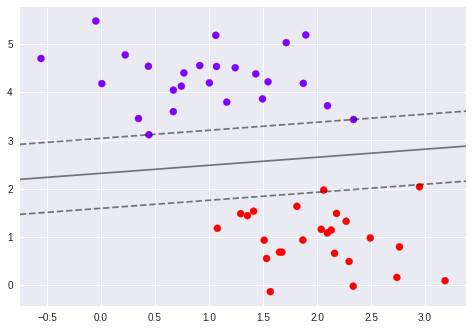

In [56]:
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,P
        ,colors="k"
        ,levels=[-1,0,1]
        ,alpha=0.5
        ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#则可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [57]:
##
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
X.shape

(100, 2)

In [58]:
y.shape

(100,)

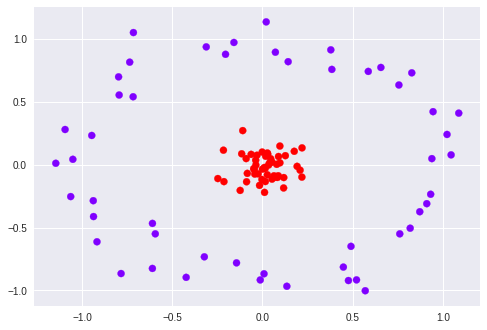

In [59]:
# Use circle
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
X.shape
y.shape
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

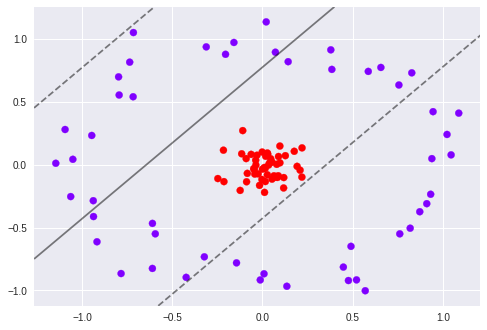

In [60]:
# Use previous defined function to run
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [61]:
# Use another way to draw lines to separate dots
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


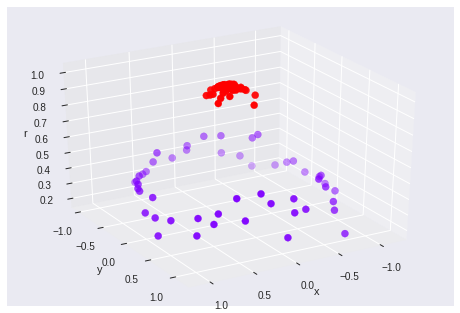

In [65]:
from mpl_toolkits import mplot3d
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度

def plot_3D(elev=30,azim=30,X=X,y=y):
      ax = plt.subplot(projection="3d")
      ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')

      ax.view_init(elev=elev,azim=azim)
      ax.set_xlabel("x")
      ax.set_ylabel("y")
      ax.set_zlabel("r")
      plt.show()
      
#轉60度      
#plot_3D(elev=60)
#plot_3D(elev=90)
#plot_3D()
plot_3D(azim=60)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


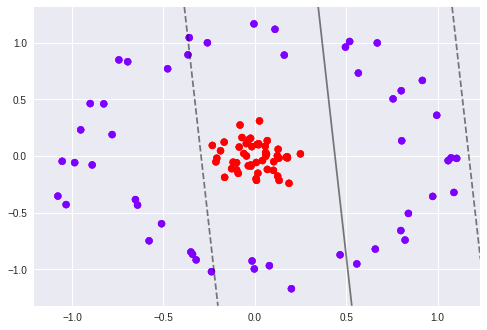

In [67]:
##
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
def plot_svc_decision_function(model,ax=None):
      if ax is None:
        ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()
      x = np.linspace(xlim[0],xlim[1],30)
      y = np.linspace(ylim[0],ylim[1],30)
      Y,X = np.meshgrid(y,x)
      xy = np.vstack([X.ravel(), Y.ravel()]).T
      P = model.decision_function(xy).reshape(X.shape)
      ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
      ax.set_xlim(xlim)
      ax.set_ylim(ylim)

clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
      ax = plt.subplot(projection="3d")
      ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
      ax.view_init(elev=elev,azim=azim)
      ax.set_xlabel("x")
      ax.set_ylabel("y")
      ax.set_zlabel("r")
plt.show()

In [69]:
## Run this code in Jupiter NB
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


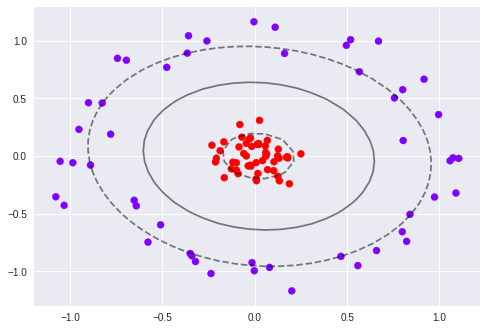

In [70]:
##
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)